### Clustering
* el objetivo es agrupar los datos en un grupo donde los mienbros presentan semejanzas
* tambien que los datos que forman otros grupos tengan rasgos bien diferenciados; el modelo trabaja con semejanzas y diferencias
* los clusters (grupos) deben ser identificables y de tamaño fiable
* los puntos de un mismo cluster deben ser compactos y tener interseccion minima con cualquier otro clusters
* los clustesr deben tener sentido , deben tener propiedades comunes dentro del contexto estudiado
* ejemplos uso:marketing digital, detencion epicentro terremotos, imputar valores Nan en un data set, planificacion urbana..

### Matematicas 
* juega con las semejanzas y diferencias; trabaja con la distancia entre los datos, cuando menor es la distancia mas parecidos son 
* Tipo de diferencias: Por ejemplo D. de Manhattan (las sumas de las diferencias), D.Euclidea(los mismo pero elevado al cuadrado y hacemos la raiz cuadrada), D.Minkowski( usa las dos para hacer calculos(ej ver distance_matrix en scipy))
* distance_matrix: es una matriz, con las distancias entre cada usuario/individuo o lo que queramos medir.
* pd.DataFrame(distance_matrix(data["movies"],data["movies"],p=2),index=data["user_id"],columns=data["user_id"])
* para evitar fallos en la distancia devido a las divergencias entre los datos numericos(pej uno en millones y otro menores que 0), hacemos una normalizacion (Minmaxscaler)

In [1]:
from scipy.spatial import distance_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url =r"https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/movies/movies.csv"
data = pd.read_csv(url,sep=";")
data

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6
5,6,2.5,3.7,6.5
6,7,2.0,8.2,8.5
7,8,1.8,9.3,4.5
8,9,2.6,1.7,3.1
9,10,1.5,4.7,2.3


In [18]:
# primero nos quedamos solo con los valores, sin usar la columna de user id
# no hace falta normalizar porque son todos numeros del 1 al 10
movies = data.columns.values.tolist()[1:]
movies

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [19]:
# p siginifica el tipo de distancia (manhattan, euclidea, minkoswski etc..); cuando mayor es el indice mas pequeña es la distancia 
dd1 = distance_matrix(data[movies],data[movies],p=1)
dd2 = distance_matrix(data[movies],data[movies],p=2)
dd10 = distance_matrix(data[movies],data[movies],p=10)

In [20]:
def dm_to_df(dd,col_name):
    return pd.DataFrame(dd,index=col_name,columns=col_name)

# lo pasamos a dataframe para visualizar bien el array; usamos como indice y columnas data["customer_id"]; vemos que la diagonal es 0, es el mismo usario, y se repiten muchos datos ya que la distancia de A-B es igual B-A
dm_to_df(dd1,data["user_id"])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


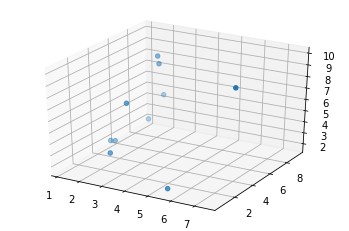

In [21]:
# vamos a hacer una representacion grafica en 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter(xs=data['star_wars'],ys=data['lord_of_the_rings'],zs=data['harry_potter'])

* vemos por ejemplo x representa star wars, y lord of the ring y z(vertical) harry poter
### clustering jerarquico
* se dividen en aglomerativos y disociativos
* metodos de enlace: distancia minima o enlace simple(es el minimo de las distancias entre cualquier punto de cluster 1 y 2), enlace completo(la max distancia), enlace promedio(el promedio de las distancias),enlace centroide(el punto medio en cada cluster), enlace de Ward(los cluster minimizan la varianza dentro de los puntos del mismo y en el dataset global)

### clustering jerarquico aglomerativo
* empieza con cada observacion siendo un cluster (n-cluster)
* encontramos la menor distancia en la matrix de distancia y unimos las dos observaciones en un nuevo cluster
* recalculamos las distancias con los metodos de enlace
* repetimos pasos dos y tres hasta que solo queda un cluster con las N observaciones
* segun el tipo de enlace saldran diferentes cluster (aunque al final solo quede uno)


In [22]:
# vamos a hacer a mano este proceso
df = dm_to_df(dd1,data["user_id"])

In [23]:
z = []

In [24]:
# tenemos que averiguar la distancia mas pequeña (es 0.7 en la row 1 columna 10)
# creamos nueva columna con la suma de la distancia, tanto a nivel columnas como de filas
df[11] = df[1]+df[10] # creamos nueva columna
df.loc[11] = df.loc[1] + df.loc[10] # creamos nueva fila
z.append([1,10,0.7,2]) # id1,id2,distancia(d),n_elementos_en_cluster
df

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,19.5
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,31.1
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,17.9
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,8.1
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,13.1
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,20.7
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,14.5
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,10.5


In [25]:
# ahora hacemos nuevo cluster con el min de cada columna/fila
for i in df.columns.values.tolist():
    df.loc[11][1] = min(df.loc[1][i],df.loc[10][i])
    df.loc[i][11] = min(df.loc[i][1],df.loc[i][10])
df

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.0
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,4.9


In [26]:
# ahora podemos quitar las col/fil 1 y 10 que han sido aglutitandos en el 11
df = df.drop([1,10])
df = df.drop([1,10],axis=1)
df

user_id,2,3,4,5,6,7,8,9,11
user_id,,,,,,,,,
2,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9
11,19.5,31.1,17.9,8.1,13.1,20.7,14.5,10.5,0.0


* continuamos asi hasta que solo nos queda un dato(n); tenemos una matriz Z con toda la informacion, y asi poder generar un dendograma
* https://www.jacobsoft.com.mx/es_mx/clustering-jerarquico-con-python/

In [27]:
# clustering jerarquico con python
from scipy.cluster.hierarchy import dendrogram,linkage
data[movies]

,star_wars,lord_of_the_rings,harry_potter
0,1.2,4.9,2.1
1,2.1,8.1,7.9
2,7.4,3.0,9.9
3,5.6,0.5,1.8
4,1.5,8.3,2.6
5,2.5,3.7,6.5
6,2.0,8.2,8.5
7,1.8,9.3,4.5
8,2.6,1.7,3.1
9,1.5,4.7,2.3


In [28]:
# linkage nos devuelve una matriz (z= id1,id2,distancia(d),n_elementos_en_cluster), eligiendo el metodo de enlace que queramos
z = linkage(data[movies],"ward")
z

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 3.        ,  8.        ,  3.48281495,  2.        ],
       [ 5.        , 10.        ,  5.2943366 ,  3.        ],
       [13.        , 14.        ,  6.59317829,  5.        ],
       [11.        , 12.        ,  6.66408283,  4.        ],
       [ 2.        , 15.        , 10.62355873,  6.        ],
       [16.        , 17.        , 12.8156935 , 10.        ]])

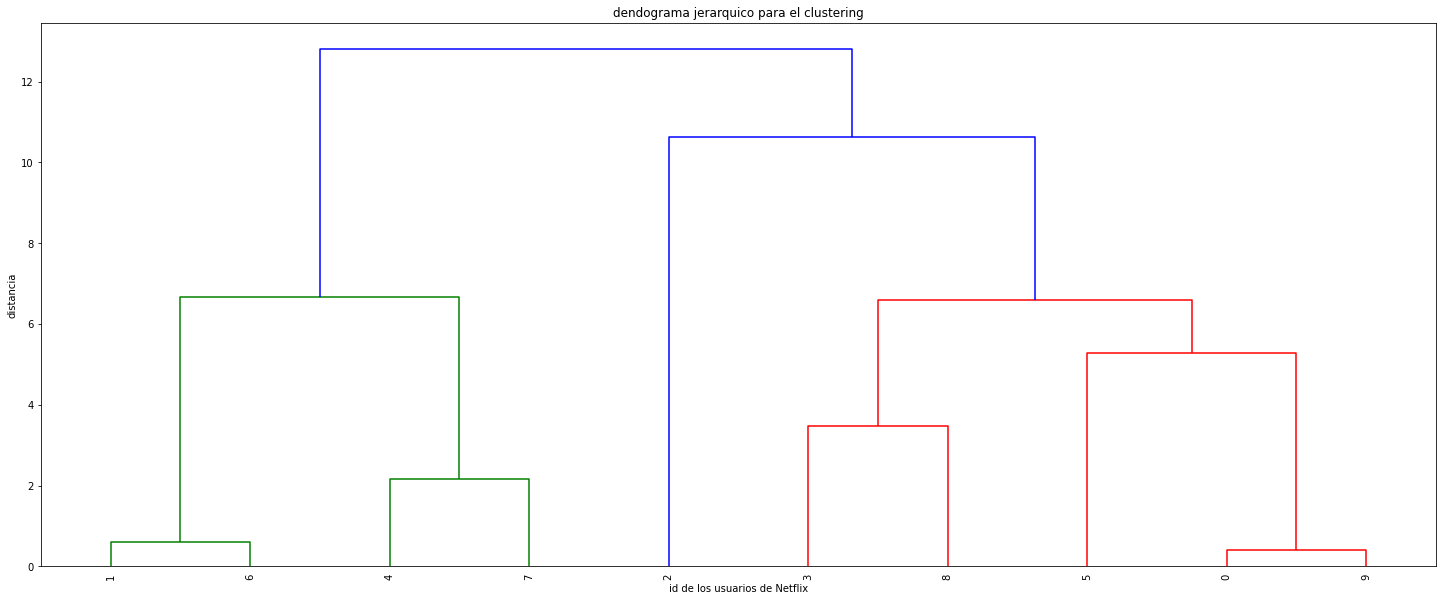

In [29]:
# ahora pintamos un dendogram
plt.figure(figsize=(25,10))
plt.title("dendograma jerarquico para el clustering")
plt.xlabel("id de los usuarios de Netflix")
plt.ylabel("distancia")
dendrogram(z,leaf_rotation=90.,leaf_font_size=10.0)
plt.show()

* vemos que el ultimo cluster seria el usario 2, porque? como dijimos antes tienen que tener similitud y tener sentido desde el punto de vista del modelo de negocio (empresarial): en esta caso el id 2 se corresponde a la persona, usuario atipico, que valora muy bien dos peliculas y la ultima fatal ( ver la respresentacion en 3D)
* The distance metric to use. The distance function can be ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’.
* segun los datos se usaran una u otra https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html

### Ejemplo de clustering jerarquico y dendograma
Antes de comenzar aclaramemos las notaciones
* X dataset(array de n x m) de puntos a clusterizasr
* n numero de datos
* m numero de rasgos
* Z array de enlace del cluster con la informacion de las uniones
* K numero de cluster


(150, 2)


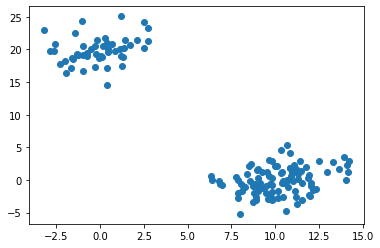

In [30]:
# primero creamos los datos y graficamos
np.random.seed(0)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]],size=[100,]) # crea 100 puntos, sobre el valor 10, son desviacion tipia 3 horizontal y 4 en vertical
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]],size=[50,])
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [31]:
Z = linkage(X, "ward")

In [32]:
# ya tenemos z, ahora debemos comprobar el coef de correlacion cophenet (cuando mas cercano sea el valor a 1 mejor)
# https://imedea.uib-csic.es/master/cambioglobal/Modulo_V_cod101615/Lab/Exercices/CA_hierarchica.pdf

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dist = cophenet(Z,pdist(X))
c

0.9791819141041482

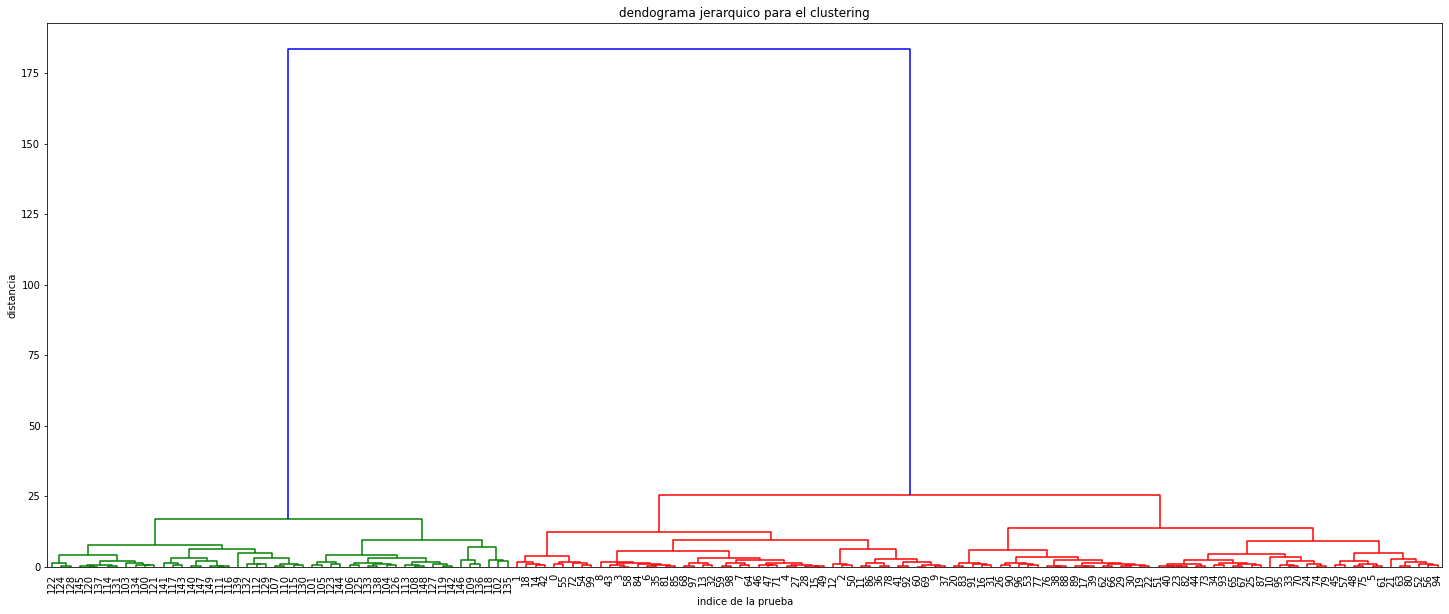

In [33]:
# representacion grafica
plt.figure(figsize=(25,10))
plt.title("dendograma jerarquico para el clustering")
plt.xlabel("indice de la prueba")
plt.ylabel("distancia")
dendrogram(Z,leaf_rotation=90.,leaf_font_size=10.0)
plt.show()

### el corte
* despues se hace una seleccion de cuantos cluster queremos con una linea horizontal, el el umbral que queramos. Por ejemplo aqui podemos marcar el limite de 25; esto seria la forma manual de seleccion, despues podemos hacer una seleccion automatica (con grafico del codo etc..)

In [36]:
# seleccion de cluster automatica con el coeficiente de incosistencia ( la fraccion entre una determinada altura  menos el promedio de todas esas determinadas  alturas, entre la varianza de todas las alturas ), pero mejor no lo usaremos. 
# devuelve un array con el promedio , la desviacion estandar, el numero de elementos  y el factor de incosistencia para cada una de las uniones
from scipy.cluster.hierarchy import inconsistent
depth = 5 # en funcion de la profundidad nos saldran diferentes resultados por eso usaremos otros metodos
incons = inconsistent(Z,depth)
incons[-10:] # la ultima columna serian el factor de incosistencia 


array([[ 2.91813988,  2.41840632,  5.        ,  1.73697584],
       [ 1.99073553,  2.09683678, 21.        ,  2.68301041],
       [ 1.84531675,  2.07507841, 23.        ,  3.56093372],
       [ 2.37814254,  2.43019   , 17.        ,  2.86451731],
       [ 1.93487881,  2.25348882, 23.        ,  3.28661056],
       [ 2.83794322,  3.01689216, 22.        ,  3.12095265],
       [ 2.69248699,  3.05448722, 26.        ,  3.65907276],
       [ 3.39499334,  3.54255478, 27.        ,  3.77677687],
       [ 4.55143142,  5.21826691, 30.        ,  4.01888987],
       [11.89310134, 32.28181173, 31.        ,  5.31726439]])

### podemos tambien usar el meteodo del codo 
* (despues lo veremos en el k-means); este medodo busca el punto donde la acelaracion de las distancias de los cluster es mayor

In [38]:
last = Z[-10:,2]  # nos quedamos solamente los 10 ultimos y con las distancias (recordemos que tenia 4 columnas)
last_rev = last[::-1] # revertimos los datos, los dos :: significan todos los datos, y -1 que se revierte el orden
last_rev

array([183.54402924,  25.52307146,  16.7744323 ,  13.86907799,
        12.25352079,   9.34121894,   9.33946385,   9.23453344,
         7.61657043,   7.11885324])

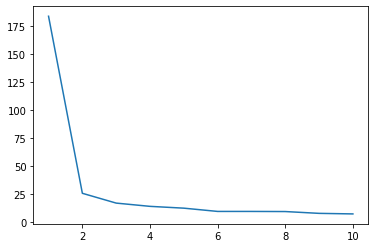

In [40]:
idx = np.arange(1,len(last_rev)+1)  # ahora creamos los indices
# ahora graficamos
plt.plot(idx,last_rev)

In [ ]:
# vemos que el numero de cluster a elegir en funcion del codo (donde la acelarion es mayor)
# pero tampoco usaremos este modelo porque segun el caso puede presentar algun problemas    
# lo mejor representar el dendograma y preguntar a los expertos (que nos han dado el dataset) para que nos digan cuantos grupos quieren

### Recuperar los clusteres y sus elementos 
* podemos hacer el criterio en funcion de la distancia  (criterion = distance) o por numero de cluster (criterion=maxclust)

In [41]:
from scipy.cluster.hierarchy import fcluster
max_d = 20  # la altura de corte horizontal en el dendograma donde queremos hacer la seleccion
cluster = fcluster(Z,max_d, criterion="distance")
cluster

array([2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2,
       3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3,
       3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [42]:
# lo mismo pero con otro criterio, corto por numero de cluster
k=3
cluster = fcluster(Z,k, criterion="maxclust")
cluster

array([2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2,
       3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3,
       3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)